In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [79]:
suites = ["number_prep", "number_src", "number_orc",
          "reflexive_src_fem", "reflexive_src_masc",
          "reflexive_orc_fem", "reflexive_orc_masc",
          "reflexive_prep_fem", "reflexive_prep_masc",
          "subordination_src-src", "subordination_orc-orc", "subordination_pp-pp"]

In [80]:
critical_regions = {
    "number_prep": 7,
    "number_src": 8,
    "number_orc": 8,
    "subordination_src-src": 6,
    "subordination_orc-orc": 6,
    "subordination_pp-pp": 6,
    "reflexive_src_fem": 9,
    "reflexive_src_masc": 9,
    "reflexive_orc_fem": 9,
    "reflexive_orc_masc": 9,
    "reflexive_prep_fem": 8,
    "reflexive_prep_masc": 8,
}

In [81]:
# Format: suite_first_token -> [(expected_grammatical, expected_ungrammatical), ...]

margin_measures = {
    "number": [("match_sing", "mismatch_sing"),
               ("match_plural", "mismatch_plural")],
    "reflexive": [("match_sing", "mismatch_sing"),
                  ("match_plural", "mismatch_plural")],
    "subordination": [("no-sub_no-matrix", "sub_no-matrix"),
                      ("sub_matrix", "no-sub_matrix")],
}

In [82]:
# sns.set_context("talk")

# TODO chcek for sentence level comparisons

## Prediction results

In [83]:
prediction_dfs = [pd.read_csv(f"{suite}.predictions.csv") for suite in suites]
prediction_df = pd.concat(prediction_dfs, names=["suite"], keys=suites)
prediction_df["first_item"] = prediction_df.used_item_numbers.str.split().str.get(0)

canonical_suite = {suite_name: next(can_suite for can_suite in critical_regions.keys()
                                    if can_suite in suite_name)
                   for suite_name in set(prediction_df.index.get_level_values("suite"))}

prediction_df["canonical_suite"] = prediction_df.index.get_level_values("suite").map(canonical_suite)
prediction_df["suite_category"] = prediction_df.canonical_suite.str.split("_").str[:-1].apply("_".join)
prediction_df["critical_region"] = prediction_df.canonical_suite.map(critical_regions)

prediction_df["num_prefix_sentences"] = prediction_df.used_conditions.str.count(" ").fillna(0)
prediction_df["prefix_length_bin"] = pd.cut(prediction_df.prefix_length, 10).astype(str)

prediction_df

item_number  prediction_0  prediction_1  \
suite                                                               
number_prep         0               1          True          True   
                    1               2          True         False   
                    2               3         False         False   
                    3               4          True         False   
                    4               5         False          True   
...                               ...           ...           ...   
subordination_pp-pp 2443         2444          True         False   
                    2444         2445          True          True   
                    2445         2446          True          True   
                    2446         2447          True          True   
                    2447         2448          True          True   

                                                          used_item_numbers  \
suite                                                                         
number_prep         0                                                     1   
                    1                                                     2   
                    2                                                     3   
                    3                                                     4   
                    4                                                     5   
...                                                                     ...   
subordination_pp-pp 2443  11 10 14 3 1 23 4 20 19 7 2 9 16 5 22 14 12 8 ...   
                    2444  16 7 11 7 18 9 12 20 2 17 14 3 18 8 20 17 4 15...   
                    2445  7 23 20 15 12 3 4 21 18 8 20 19 21 12 3 5 19 1...   
                    2446  4 6 9 14 22 12 7 21 18 20 6 19 4 23 12 8 3 8 1...   
                    2447  8 13 22 2 4 10 21 9 3 5 7 18 6 19 13 16 10 16 ...   

                                                            used_conditions  \
suite                                                                         
number_prep         0                                                   NaN   
                    1                                                   NaN   
                    2                                                   NaN   
                    3                                                   NaN   
                    4                                                   NaN   
...                                                                     ...   
subordination_pp-pp 2443  sub_matrix sub_matrix sub_matrix no-sub_no-mat...   
                    2444  no-sub_no-matrix no-sub_no-matrix no-sub_no-ma...   
                    2445  sub_matrix sub_matrix sub_matrix no-sub_no-mat...   
                    2446  sub_matrix no-sub_no-matrix sub_matrix no-sub_...   
                    2447  sub_matrix sub_matrix no-sub_no-matrix sub_mat...   

                          prefix_length first_item      canonical_suite  \
suite                                                                     
number_prep         0                 0          1          number_prep   
                    1                 0          2          number_prep   
                    2                 0          3          number_prep   
                    3                 0          4          number_prep   
                    4                 0          5          number_prep   
...                                 ...        ...                  ...   
subordination_pp-pp 2443             25         11  subordination_pp-pp   
                    2444             25         16  subordination_pp-pp   
                    2445             25          7  subordination_pp-pp   
                    2446             25          4  subordination_pp-pp   
                    2447             25          8  subordination_pp-pp   

                         suite_category  critical_region  \
suite                               

In [84]:
# Store basic representation of first item of each suite
basic_suite_df = prediction_df[prediction_df.prefix_length == 0].groupby("canonical_suite").first()
basic_suite_df

item_number  prediction_0  prediction_1  \
canonical_suite                                                  
number_orc                       1          True          True   
number_prep                      1          True          True   
number_src                       1          True          True   
reflexive_orc_fem                1         False          True   
reflexive_orc_masc               1          True          True   
reflexive_prep_fem               1         False          True   
reflexive_prep_masc              1          True          True   
reflexive_src_fem                1         False          True   
reflexive_src_masc               1          True          True   
subordination_orc-orc            1          True          True   
subordination_pp-pp              1          True          True   
subordination_src-src            1          True          True   

                      used_item_numbers used_conditions  prefix_length  \
canonical_suite                                                          
number_orc                            1            None              0   
number_prep                           1            None              0   
number_src                            1            None              0   
reflexive_orc_fem                     1            None              0   
reflexive_orc_masc                    1            None              0   
reflexive_prep_fem                    1            None              0   
reflexive_prep_masc                   1            None              0   
reflexive_src_fem                     1            None              0   
reflexive_src_masc                    1            None              0   
subordination_orc-orc                 1            None              0   
subordination_pp-pp                   1            None              0   
subordination_src-src                 1            None              0   

                      first_item  suite_category  critical_region  \
canonical_suite                                                     
number_orc                     1          number                8   
number_prep                    1          number                7   
number_src                     1          number                8   
reflexive_orc_fem              1   reflexive_orc                9   
reflexive_orc_masc             1   reflexive_orc                9   
reflexive_prep_fem             1  reflexive_prep                8   
reflexive_prep_masc            1  reflexive_prep                8   
reflexive_src_fem              1   reflexive_src                9   
reflexive_src_masc             1   reflexive_src                9   
subordination_orc-orc          1   subordination                6   
subordination_pp-pp            1   subordination                6   
subordination_src-src          1   subordination                6   

                       num_prefix_sentences prefix_length_bin  
canonical_suite                                                
number_orc                              0.0     (-0.036, 3.6]  
number_prep                             0.0     (-0.036, 3.6]  
number_src                              0.0     (-0.036, 3.6]  
reflexive_orc_fem                       0.0     (-0.036, 3.6]  
reflexive_orc_masc                      0.0     (-0.036, 3.6]  
reflexive_prep_fem                      0.0     (-0.036, 3.6]  
reflexive_prep_masc                     0.0     (-0.036, 3.6]  
reflexive_src_fem                       0.0     (-0.036, 3.6]  
reflexive_src_masc                      0.0     (-0.036, 3.6]  
subordination_orc-orc                   0.0     (-0.036, 3.6]  
subordination_pp-pp                     0.0     (-0.036, 3.6]  
subordination_src-src                   0.0     (-0.036, 3.6]

In [85]:
# Get baseline accuracy results.
prediction_df[prediction_df.used_conditions.isna()] \
    [[col for col in prediction_df if col.startswith("prediction_") or col == "canonical_suite"]] \
    .melt(id_vars=["canonical_suite"]).groupby(["canonical_suite", "variable"]).value.mean()

canonical_suite        variable    
number_orc             prediction_0    0.631579
                       prediction_1    0.473684
number_prep            prediction_0    0.789474
                       prediction_1    0.526316
number_src             prediction_0    0.842105
                       prediction_1    0.473684
reflexive_orc_fem      prediction_0    0.473684
                       prediction_1    1.000000
reflexive_orc_masc     prediction_0    0.842105
                       prediction_1    0.947368
reflexive_prep_fem     prediction_0    0.210526
                       prediction_1    1.000000
reflexive_prep_masc    prediction_0    0.894737
                       prediction_1    0.894737
reflexive_src_fem      prediction_0    0.157895
                       prediction_1    1.000000
reflexive_src_masc     prediction_0    0.684211
                       prediction_1    0.789474
subordination_orc-orc  prediction_0    1.000000
                       prediction_1    1.000000
subo

In [86]:
prediction_df[prediction_df.used_conditions.isna()].groupby("canonical_suite").prediction_0.mean()

canonical_suite
number_orc               0.631579
number_prep              0.789474
number_src               0.842105
reflexive_orc_fem        0.473684
reflexive_orc_masc       0.842105
reflexive_prep_fem       0.210526
reflexive_prep_masc      0.894737
reflexive_src_fem        0.157895
reflexive_src_masc       0.684211
subordination_orc-orc    1.000000
subordination_pp-pp      1.000000
subordination_src-src    1.000000
Name: prediction_0, dtype: float64

<AxesSubplot:ylabel='Frequency'>

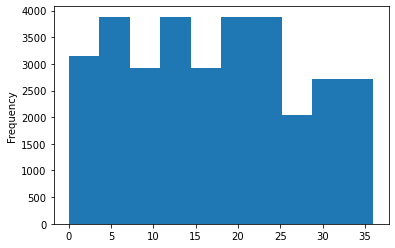

In [87]:
prediction_df.prefix_length.plot.hist()

In [89]:
prediction_df_melt = prediction_df.reset_index()
meta_vars = ["num_prefix_sentences", "prefix_length", "prefix_length_bin", "canonical_suite", "suite_category", "item_number"]
prediction_df_melt = prediction_df_melt.loc[:, prediction_df_melt.columns.str.startswith(("prediction",) + tuple(meta_vars))] \
    .melt(id_vars=meta_vars, var_name="prediction", value_name="correct")
prediction_df_melt

num_prefix_sentences  prefix_length prefix_length_bin  \
0                       0.0              0     (-0.036, 3.6]   
1                       0.0              0     (-0.036, 3.6]   
2                       0.0              0     (-0.036, 3.6]   
3                       0.0              0     (-0.036, 3.6]   
4                       0.0              0     (-0.036, 3.6]   
...                     ...            ...               ...   
63985                  24.0             25      (21.6, 25.2]   
63986                  24.0             25      (21.6, 25.2]   
63987                  24.0             25      (21.6, 25.2]   
63988                  24.0             25      (21.6, 25.2]   
63989                  24.0             25      (21.6, 25.2]   

           canonical_suite suite_category  item_number    prediction  correct  
0              number_prep         number            1  prediction_0     True  
1              number_prep         number            2  prediction_0     True  
2              number_prep         number            3  prediction_0    False  
3              number_prep         number            4  prediction_0     True  
4              number_prep         number            5  prediction_0    False  
...                    ...            ...          ...           ...      ...  
63985  subordination_pp-pp  subordination         2444  prediction_1    False  
63986  subordination_pp-pp  subordination         2445  prediction_1     True  
63987  subordination_pp-pp  subordination         2446  prediction_1     True  
63988  subordination_pp-pp  subordination         2447  prediction_1     True  
63989  subordination_pp-pp  subordination         2448  prediction_1     True  

[63990 rows x 8 columns]

Text(1812.3167805989588, 0.5, 'Prediction accuracy')

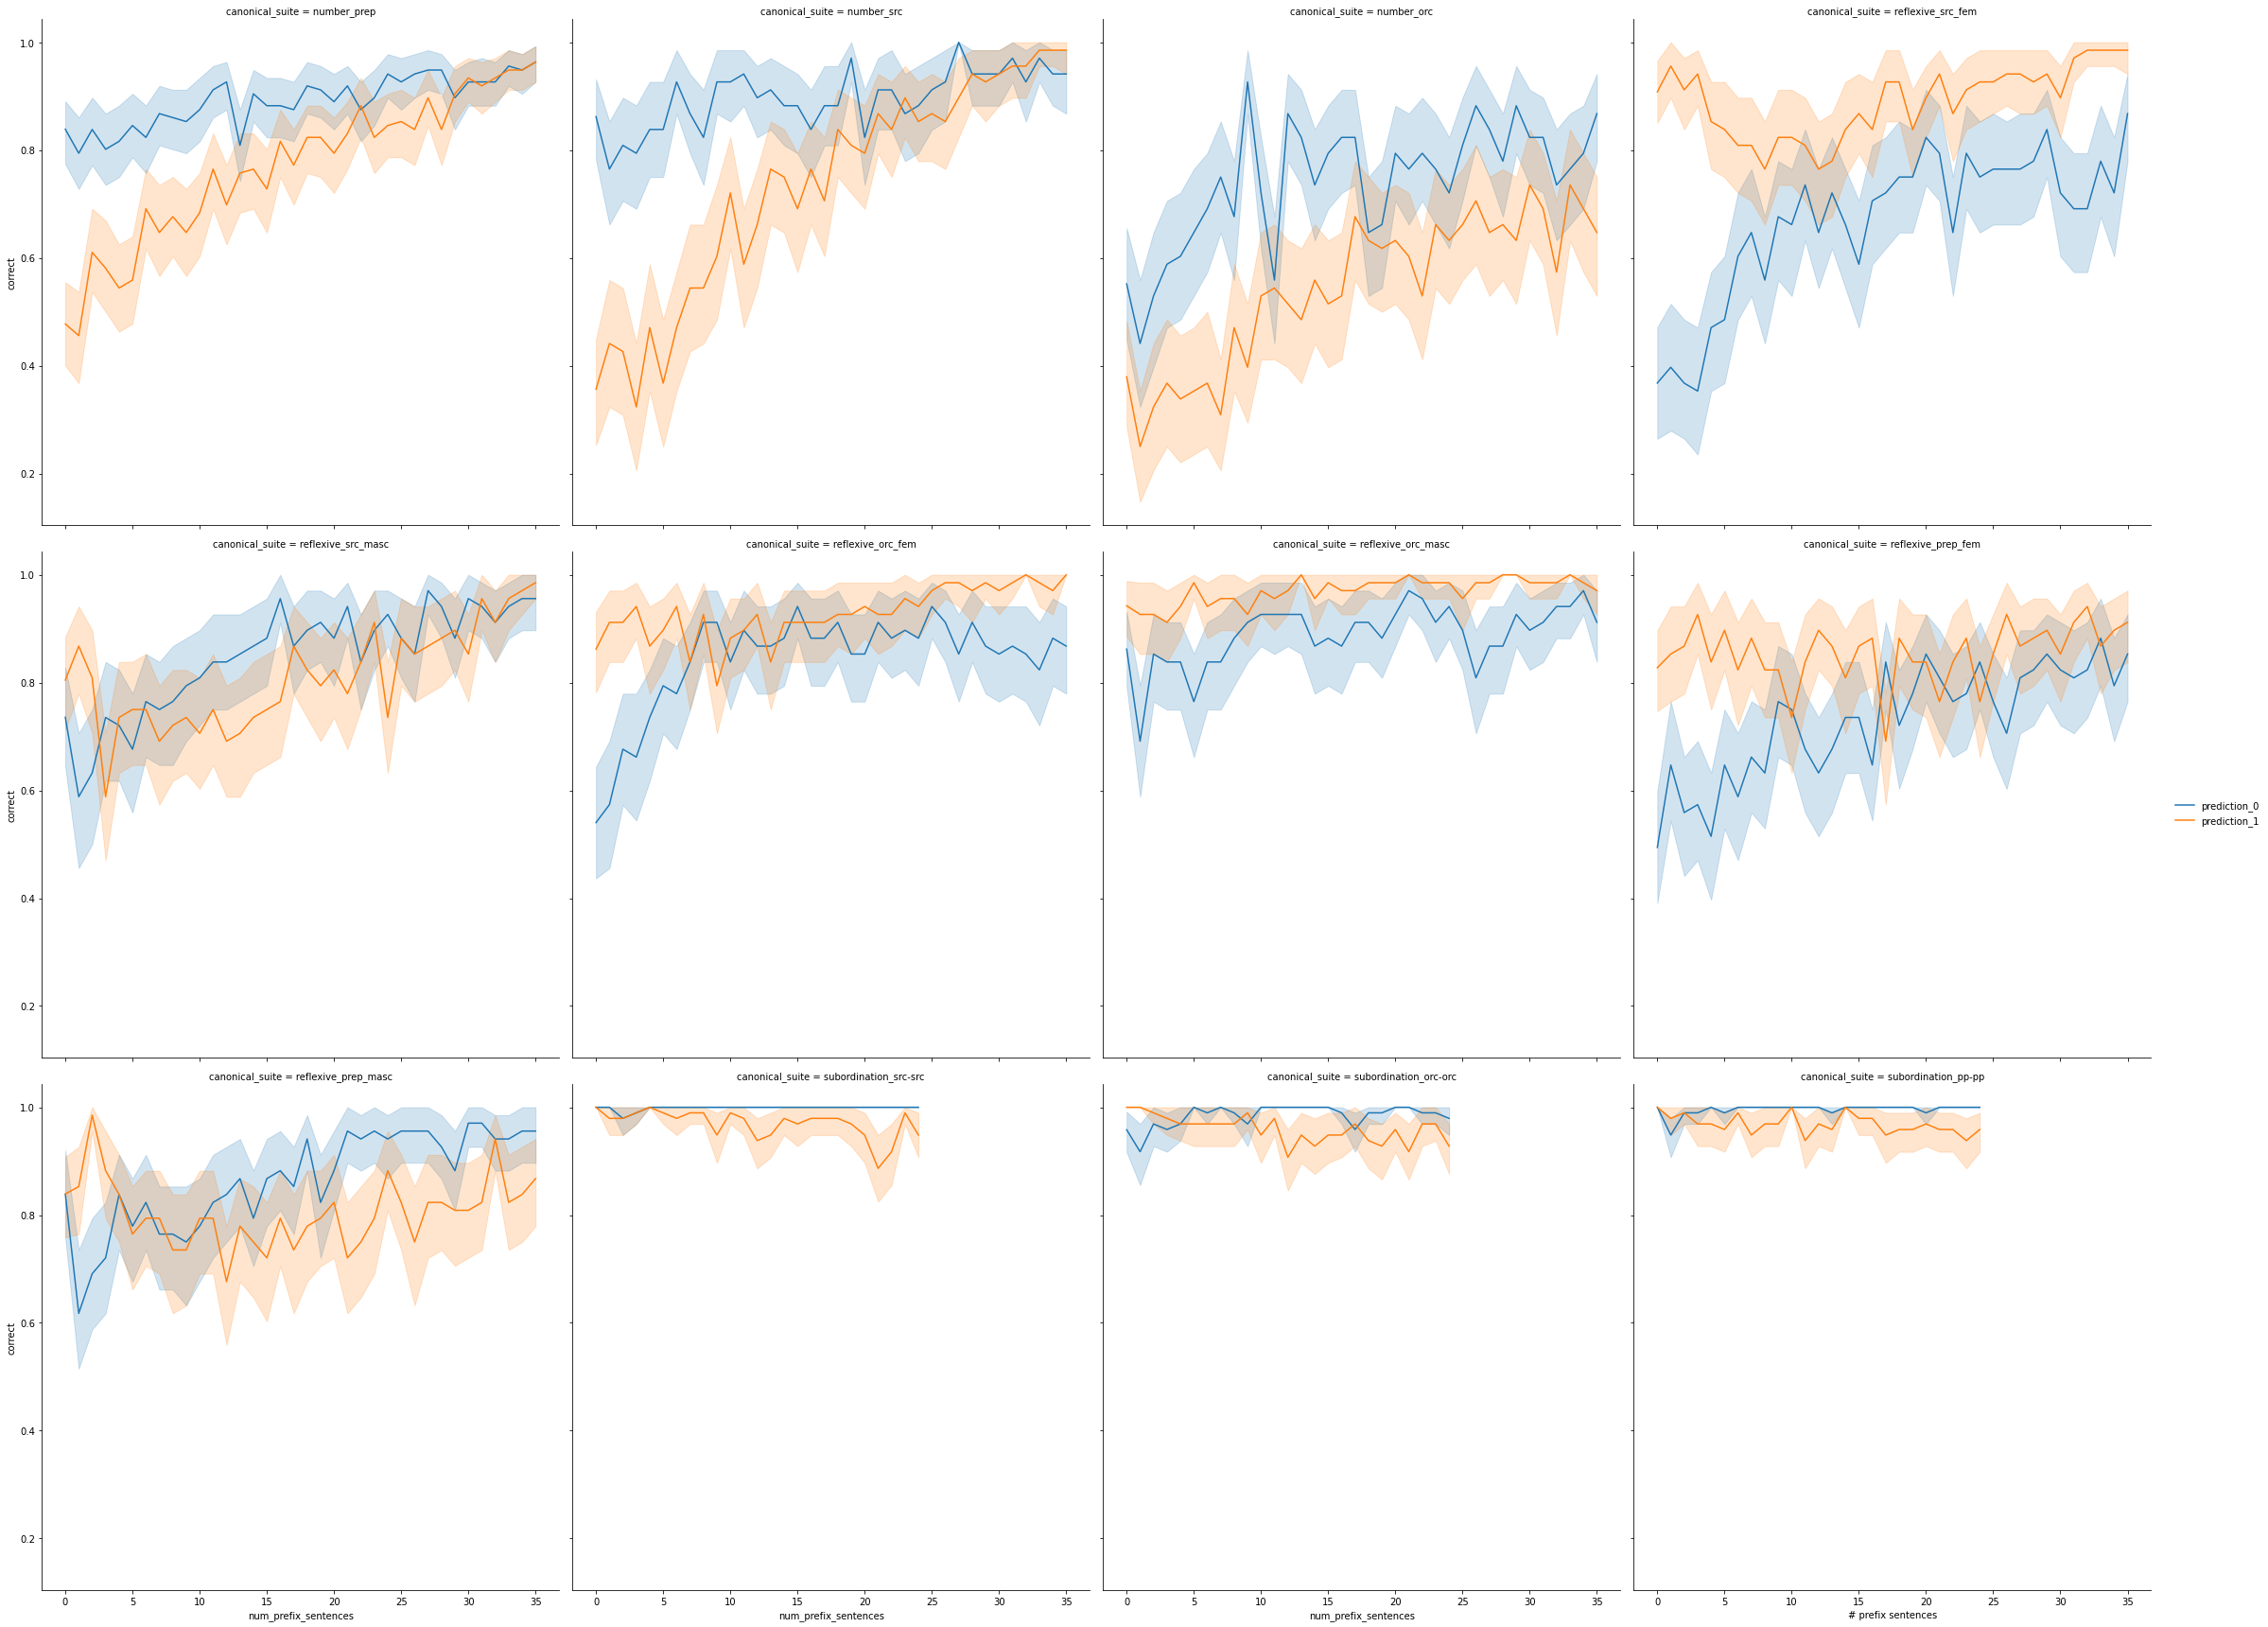

In [90]:
# TODO check conjunction of predictions

g = sns.FacetGrid(data=prediction_df_melt, height=8, col="canonical_suite", col_wrap=4)
g.map(sns.lineplot, "num_prefix_sentences", "correct", "prediction")
g.add_legend()

plt.xlabel("# prefix sentences")
plt.ylabel("Prediction accuracy")

In [91]:
# Too noisy. Use binned plot instead.
# sns.lineplot(data=prediction_df, x="prefix_length", y="prediction_0")

# plt.xlabel("# prefix tokens")
# plt.ylabel("Prediction accuracy")

Text(1815.0750730572322, 0.5, 'Prediction accuracy')

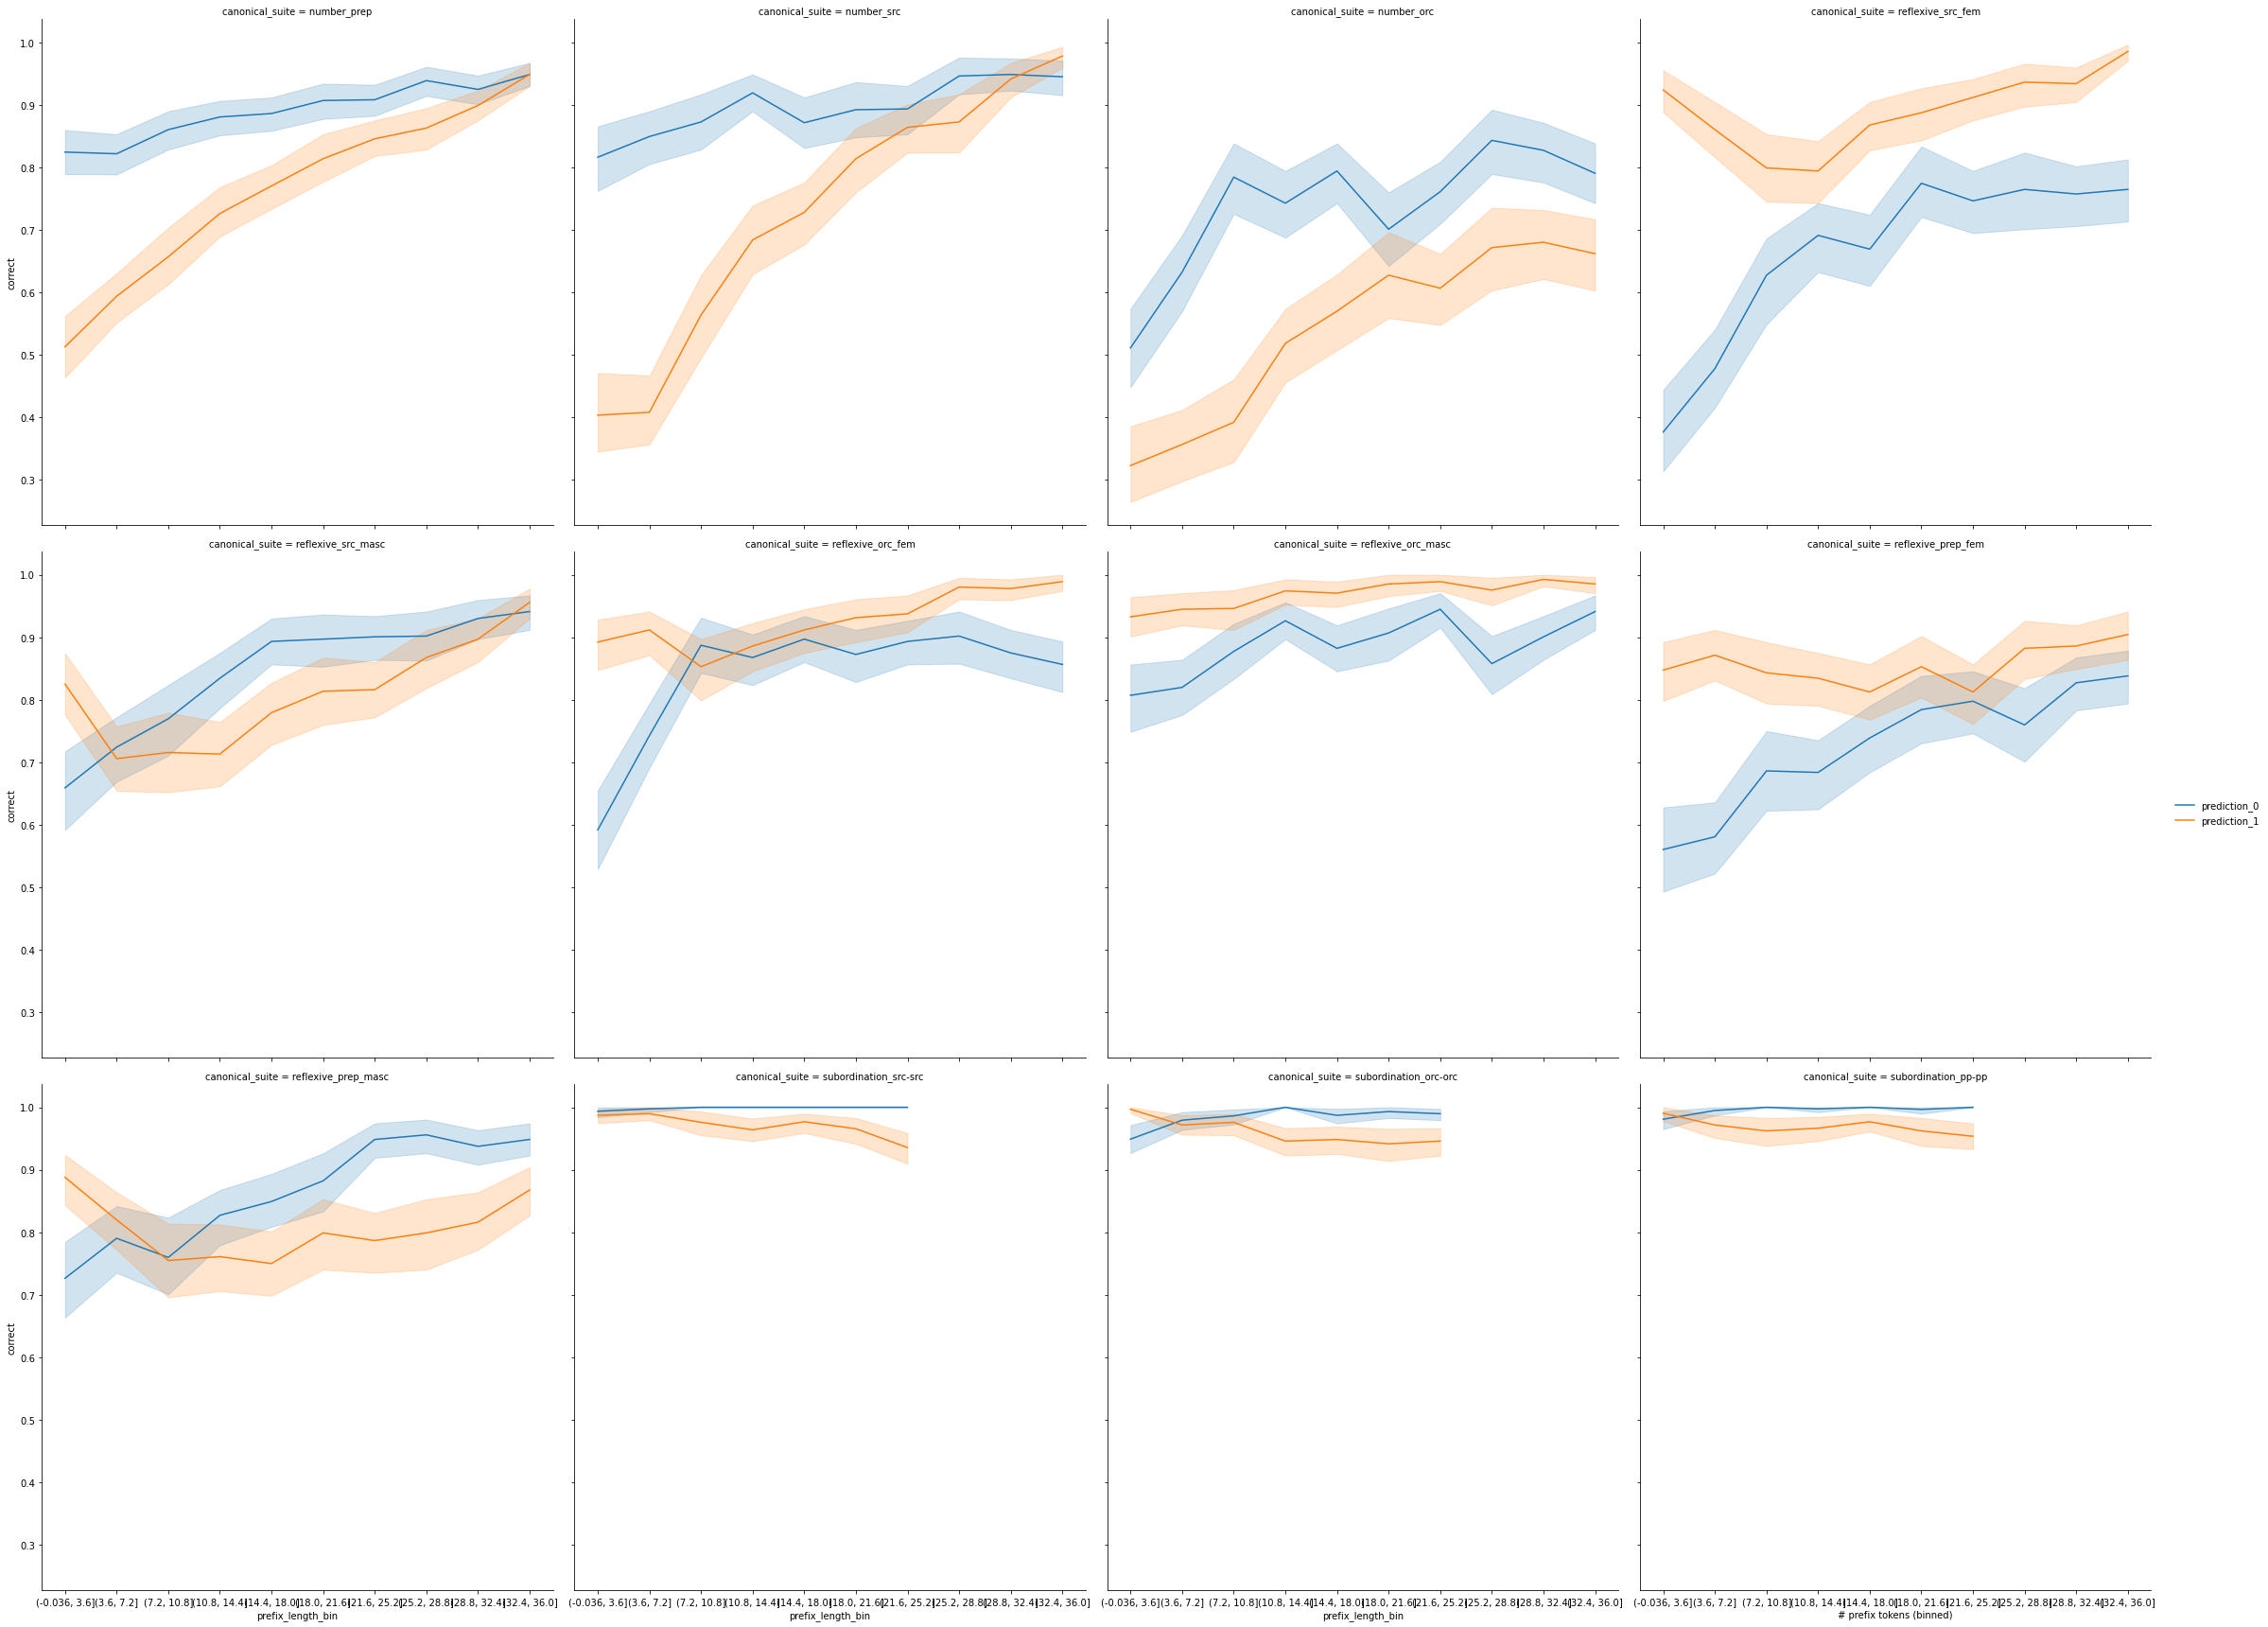

In [92]:
g = sns.FacetGrid(data=prediction_df_melt, height=8, col="canonical_suite", col_wrap=4)
g.map(sns.lineplot, "prefix_length_bin", "correct", "prediction")
g.add_legend()

plt.xlabel("# prefix tokens (binned)")
plt.ylabel("Prediction accuracy")

## Margins

In [93]:
region_dfs = [pd.read_csv(f"{suite}.regions.csv") for suite in suites]
region_df = pd.concat(region_dfs, names=["suite"], keys=suites).reset_index()
# Bring in metadata from predictions df
region_df = pd.merge(region_df.reset_index(), prediction_df[meta_vars].reset_index(),
                     on=["suite", "item_number"])

region_df

index                suite  level_1_x  item_number        value  \
0              0          number_prep          0            1    12.441164   
1           4915          number_prep       4915            1    25.171421   
2           9830          number_prep       9830            1     3.329726   
3          14745          number_prep      14745            1    16.262009   
4          19660          number_prep      19660            1     4.061763   
...          ...                  ...        ...          ...          ...   
1024291  1014503  subordination_pp-pp      48959         2448     6.065825   
1024292  1016951  subordination_pp-pp      51407         2448  2585.608643   
1024293  1019399  subordination_pp-pp      53855         2448  2585.608643   
1024294  1021847  subordination_pp-pp      56303         2448  2585.608643   
1024295  1024295  subordination_pp-pp      58751         2448  2585.608643   

                condition  region_number  level_1_y  num_prefix_sentences  \
0              match_sing              3          0                   0.0   
1              match_sing              4          0                   0.0   
2              match_sing              5          0                   0.0   
3              match_sing              6          0                   0.0   
4              match_sing              7          0                   0.0   
...                   ...            ...        ...                   ...   
1024291     no-sub_matrix              6       2447                  24.0   
1024292     sub_no-matrix              1       2447                  24.0   
1024293  no-sub_no-matrix              1       2447                  24.0   
1024294        sub_matrix              1       2447                  24.0   
1024295     no-sub_matrix              1       2447                  24.0   

         prefix_length prefix_length_bin      canonical_suite suite_category  
0                    0     (-0.036, 3.6]          number_prep         number  
1                    0     (-0.036, 3.6]          number_prep         number  
2                    0     (-0.036, 3.6]          number_prep         number  
3                    0     (-0.036, 3.6]          number_prep         number  
4                    0     (-0.036, 3.6]          number_prep         number  
...                ...               ...                  ...            ...  
1024291             25      (21.6, 25.2]  subordination_pp-pp  subordination  
1024292             25      (21.6, 25.2]  subordination_pp-pp  subordination  
1024293             25      (21.6, 25.2]  subordination_pp-pp  subordination  
1024294             25      (21.6, 25.2]  subordination_pp-pp  subordination  
1024295             25      (21.6, 25.2]  subordination_pp-pp  subordination  

[1024296 rows x 13 columns]

In [95]:
critical_region_df = region_df.groupby(["suite", "canonical_suite"], as_index=False) \
    .apply(lambda s: s[s.region_number == critical_regions[s.canonical_suite.iloc[0]]])
critical_region_df

index                  suite  level_1_x  item_number      value  \
0  246097  258427             number_orc      12335            1   2.664042   
   246104  275696             number_orc      29604            1   6.387992   
   246111  292965             number_orc      46873            1   4.316666   
   246118  310234             number_orc      64142            1   4.824700   
   246133  258428             number_orc      12336            2  15.645181   
...           ...                    ...        ...          ...        ...   
11 906763  896998  subordination_src-src      48958         2447  11.311989   
   906772  860279  subordination_src-src      12239         2448   6.276355   
   906777  872519  subordination_src-src      24479         2448   4.079598   
   906782  884759  subordination_src-src      36719         2448  29.245785   
   906787  896999  subordination_src-src      48959         2448  36.252571   

                  condition  region_number  level_1_y  num_prefix_sentences  \
0  246097        match_sing              8          0                   0.0   
   246104     mismatch_sing              8          0                   0.0   
   246111      match_plural              8          0                   0.0   
   246118   mismatch_plural              8          0                   0.0   
   246133        match_sing              8          1                   0.0   
...                     ...            ...        ...                   ...   
11 906763     no-sub_matrix              6       2446                  24.0   
   906772     sub_no-matrix              6       2447                  24.0   
   906777  no-sub_no-matrix              6       2447                  24.0   
   906782        sub_matrix              6       2447                  24.0   
   906787     no-sub_matrix              6       2447                  24.0   

           prefix_length prefix_length_bin        canonical_suite  \
0  246097              0     (-0.036, 3.6]             number_orc   
   246104              0     (-0.036, 3.6]             number_orc   
   246111              0     (-0.036, 3.6]             number_orc   
   246118              0     (-0.036, 3.6]             number_orc   
   246133              0     (-0.036, 3.6]             number_orc   
...                  ...               ...                    ...   
11 906763             25      (21.6, 25.2]  subordination_src-src   
   906772             25      (21.6, 25.2]  subordination_src-src   
   906777             25      (21.6, 25.2]  subordination_src-src   
   906782             25      (21.6, 25.2]  subordination_src-src   
   906787             25      (21.6, 25.2]  subordination_src-src   

          suite_category  
0  246097         number  
   246104         number  
   246111         number  
   246118         number  
   246133         number  
...                  ...  
11 906763  subordination  
   906772  subordination  
   906777  subordination  
   906782  subordination  
   906787  subordination  

[127980 rows x 13 columns]

Text(1729.9500000000003, 0.5, 'Raw surprisal')

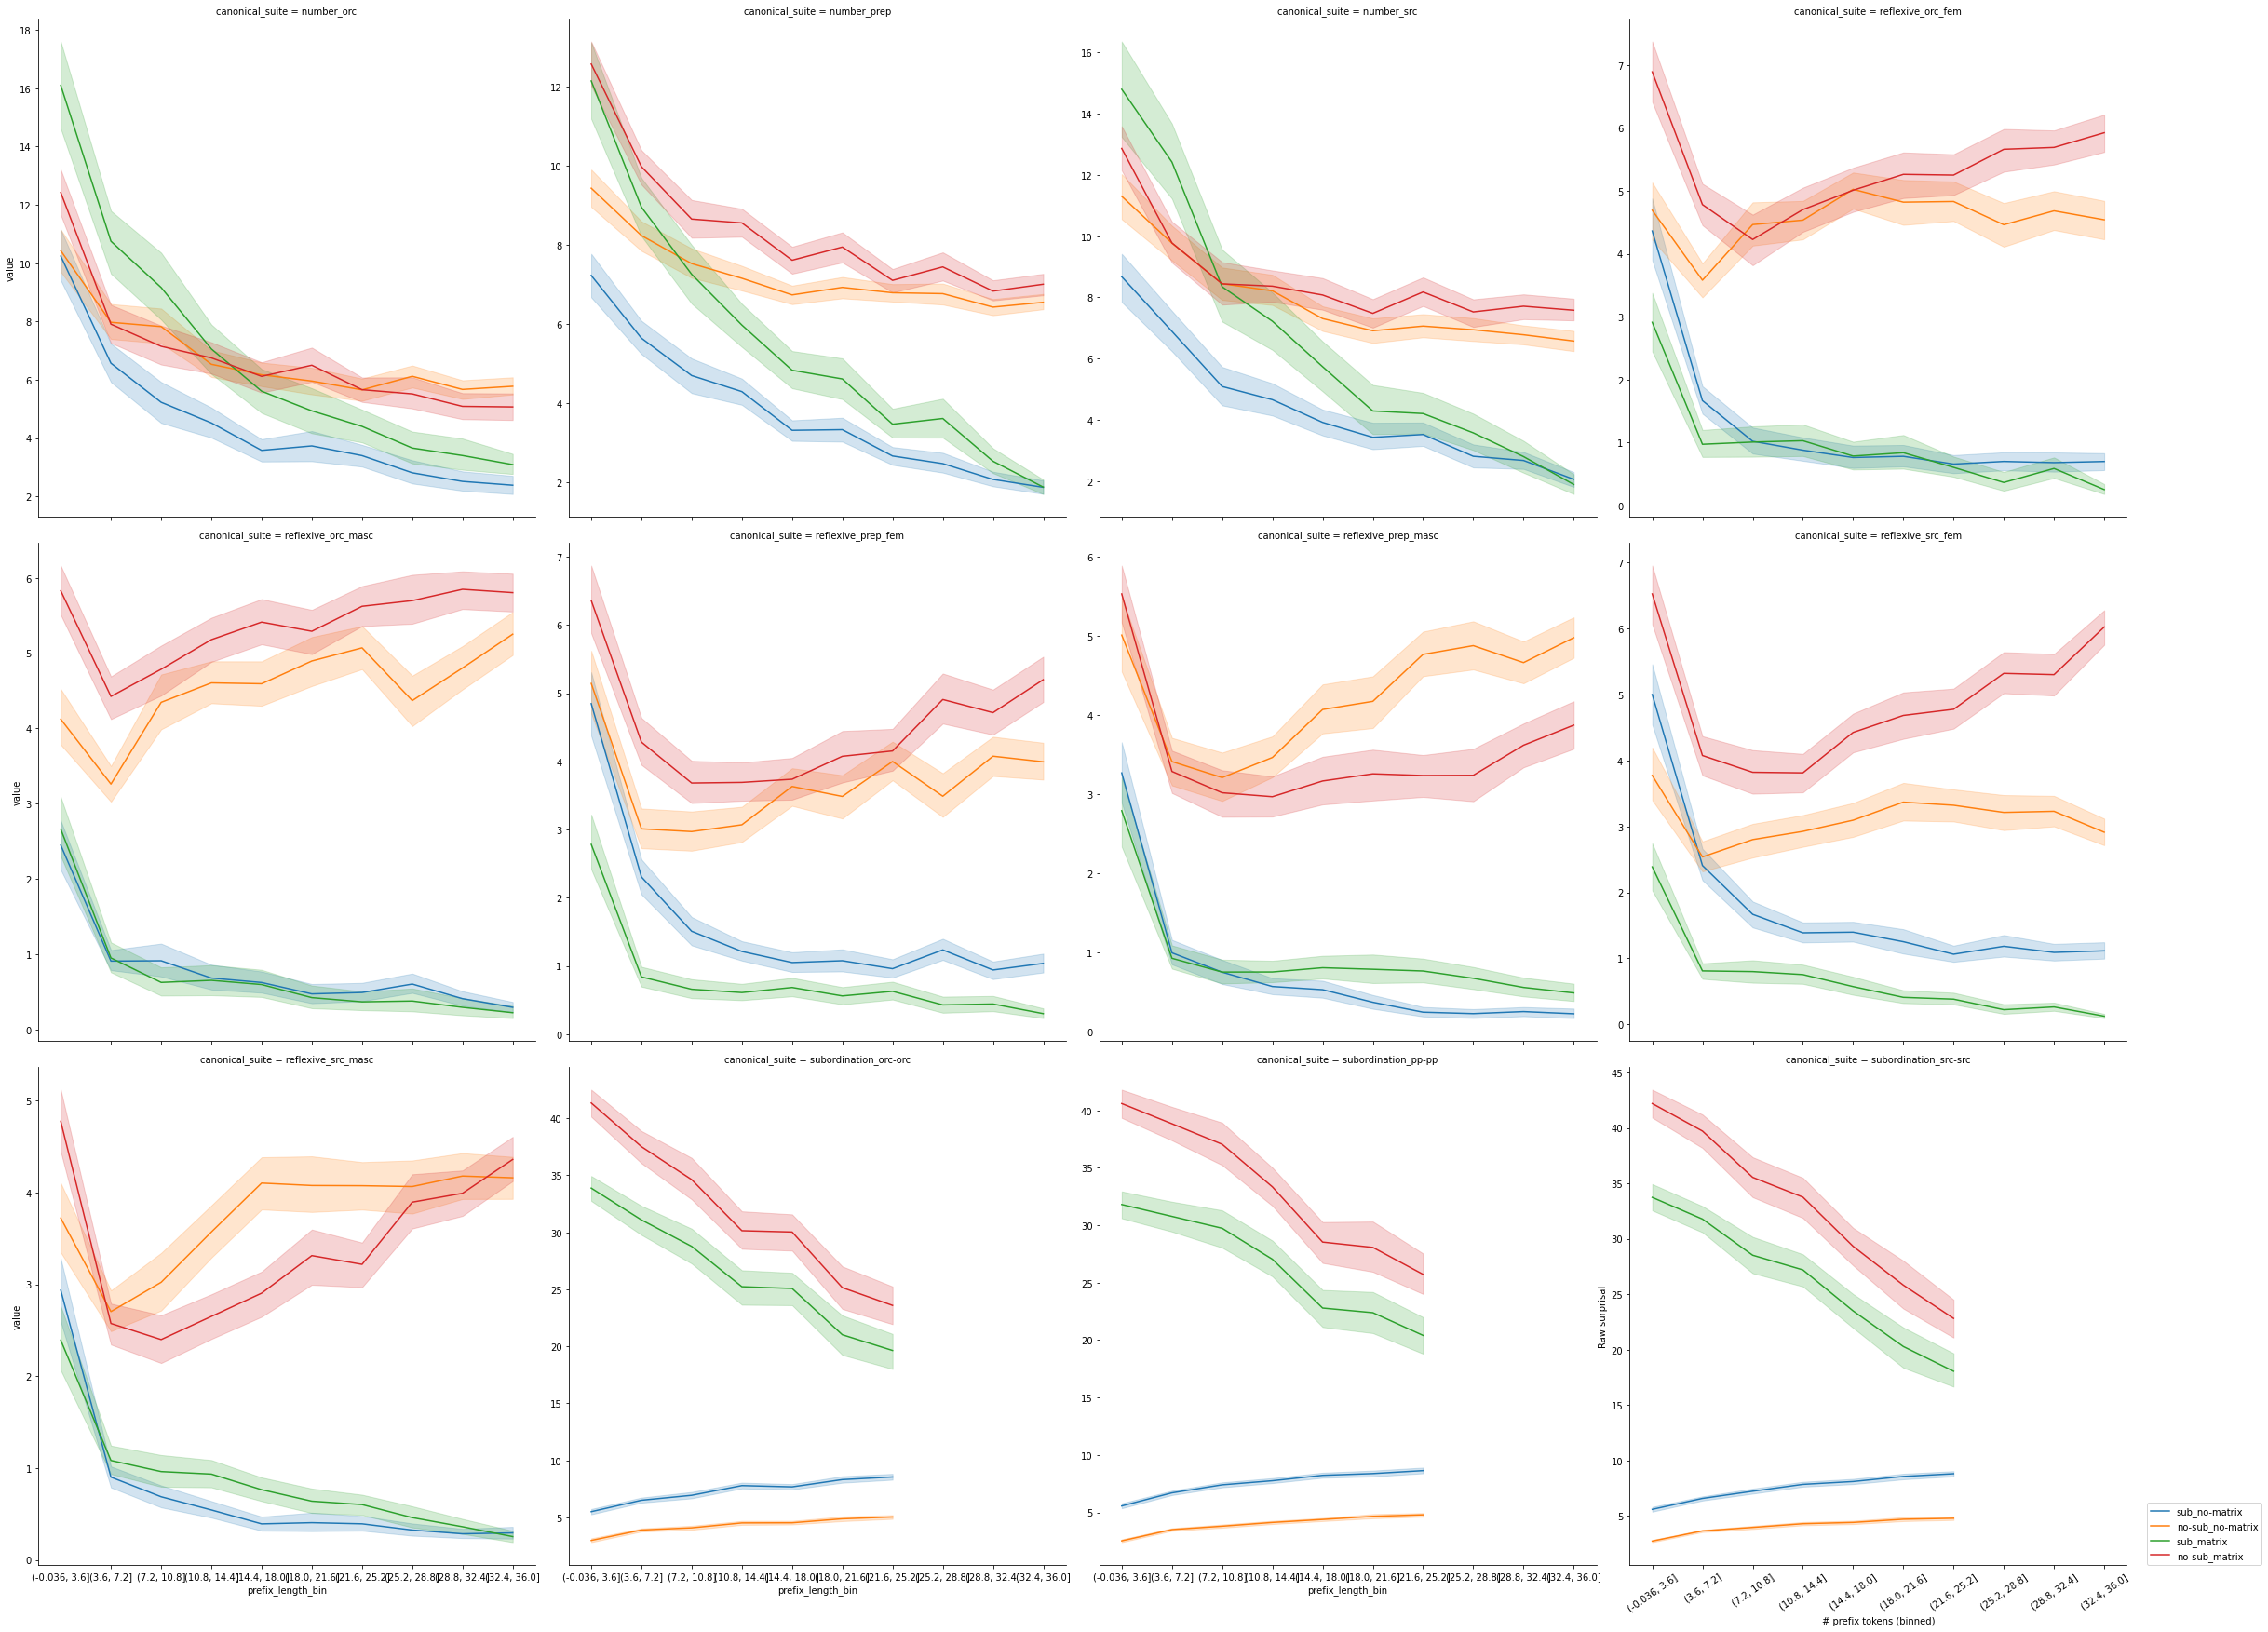

In [96]:
g = sns.FacetGrid(data=critical_region_df, height=8, col="canonical_suite", col_wrap=4, sharey=False)
g.map(sns.lineplot, "prefix_length_bin", "value", "condition")

plt.xticks(rotation=35)
plt.legend(loc=(1.04,0))
plt.xlabel("# prefix tokens (binned)")
plt.ylabel("Raw surprisal")

In [97]:
# g = sns.catplot(data=critical_region_df, x="num_prefix_sentences", y="value", hue="condition", alpha=0.1,
#                 height=10)
# sns.lineplot(data=critical_region_df, x="num_prefix_sentences", y="value", hue="condition", ax=g.ax, legend=False)

# plt.legend(loc=(1.04,0))
# plt.xlabel("# prefix sentences")
# plt.ylabel("Raw surprisal")

In [98]:
def compute_margins(rows):
    suite_margin_spec = margin_measures[rows.iloc[0].suite_category.split("_")[0]]
    rows = rows.set_index("condition").value
    return pd.Series([rows.loc[ungrammatical_cond] - rows.loc[grammatical_cond]
                      for grammatical_cond, ungrammatical_cond in suite_margin_spec])

margin_sizes = critical_region_df.groupby(["suite", "item_number"]).apply(compute_margins)
margin_sizes

0          1
suite                 item_number                     
number_orc            1            3.723949   0.508034
                      2           -1.844215 -13.168979
                      3           -0.192598 -11.530830
                      4            2.372524  -9.736126
                      5           -7.361650  -0.980772
...                                     ...        ...
subordination_src-src 2444         4.818648   1.824209
                      2445         4.321604   6.364243
                      2446         3.327927   6.469498
                      2447         7.665365   4.715309
                      2448         2.196756   7.006786

[31995 rows x 2 columns]

In [99]:
margin_sizes = pd.merge(margin_sizes.reset_index(), prediction_df[meta_vars].reset_index(),
                        on=["suite", "item_number"])
margin_sizes

suite  item_number         0          1  level_1  \
0                 number_orc            1  3.723949   0.508034        0   
1                 number_orc            2 -1.844215 -13.168979        1   
2                 number_orc            3 -0.192598 -11.530830        2   
3                 number_orc            4  2.372524  -9.736126        3   
4                 number_orc            5 -7.361650  -0.980772        4   
...                      ...          ...       ...        ...      ...   
31990  subordination_src-src         2444  4.818648   1.824209     2443   
31991  subordination_src-src         2445  4.321604   6.364243     2444   
31992  subordination_src-src         2446  3.327927   6.469498     2445   
31993  subordination_src-src         2447  7.665365   4.715309     2446   
31994  subordination_src-src         2448  2.196756   7.006786     2447   

       num_prefix_sentences  prefix_length prefix_length_bin  \
0                       0.0              0     (-0.036, 3.6]   
1                       0.0              0     (-0.036, 3.6]   
2                       0.0              0     (-0.036, 3.6]   
3                       0.0              0     (-0.036, 3.6]   
4                       0.0              0     (-0.036, 3.6]   
...                     ...            ...               ...   
31990                  24.0             25      (21.6, 25.2]   
31991                  24.0             25      (21.6, 25.2]   
31992                  24.0             25      (21.6, 25.2]   
31993                  24.0             25      (21.6, 25.2]   
31994                  24.0             25      (21.6, 25.2]   

             canonical_suite suite_category  
0                 number_orc         number  
1                 number_orc         number  
2                 number_orc         number  
3                 number_orc         number  
4                 number_orc         number  
...                      ...            ...  
31990  subordination_src-src  subordination  
31991  subordination_src-src  subordination  
31992  subordination_src-src  subordination  
31993  subordination_src-src  subordination  
31994  subordination_src-src  subordination  

[31995 rows x 10 columns]

In [100]:
# Prefer binned figure below.

# sns.lineplot(data=margin_sizes.melt(id_vars=["prefix_length"], value_vars=["sing", "plur"], var_name="Prediction"),
#              x="prefix_length", y="value", hue="Prediction")

# plt.legend(loc=(1.04, 0))
# plt.axhline(0, color="gray", linestyle="--")
# plt.xlabel("# prefix tokens")
# plt.ylabel("Grammaticality margin (bits)")

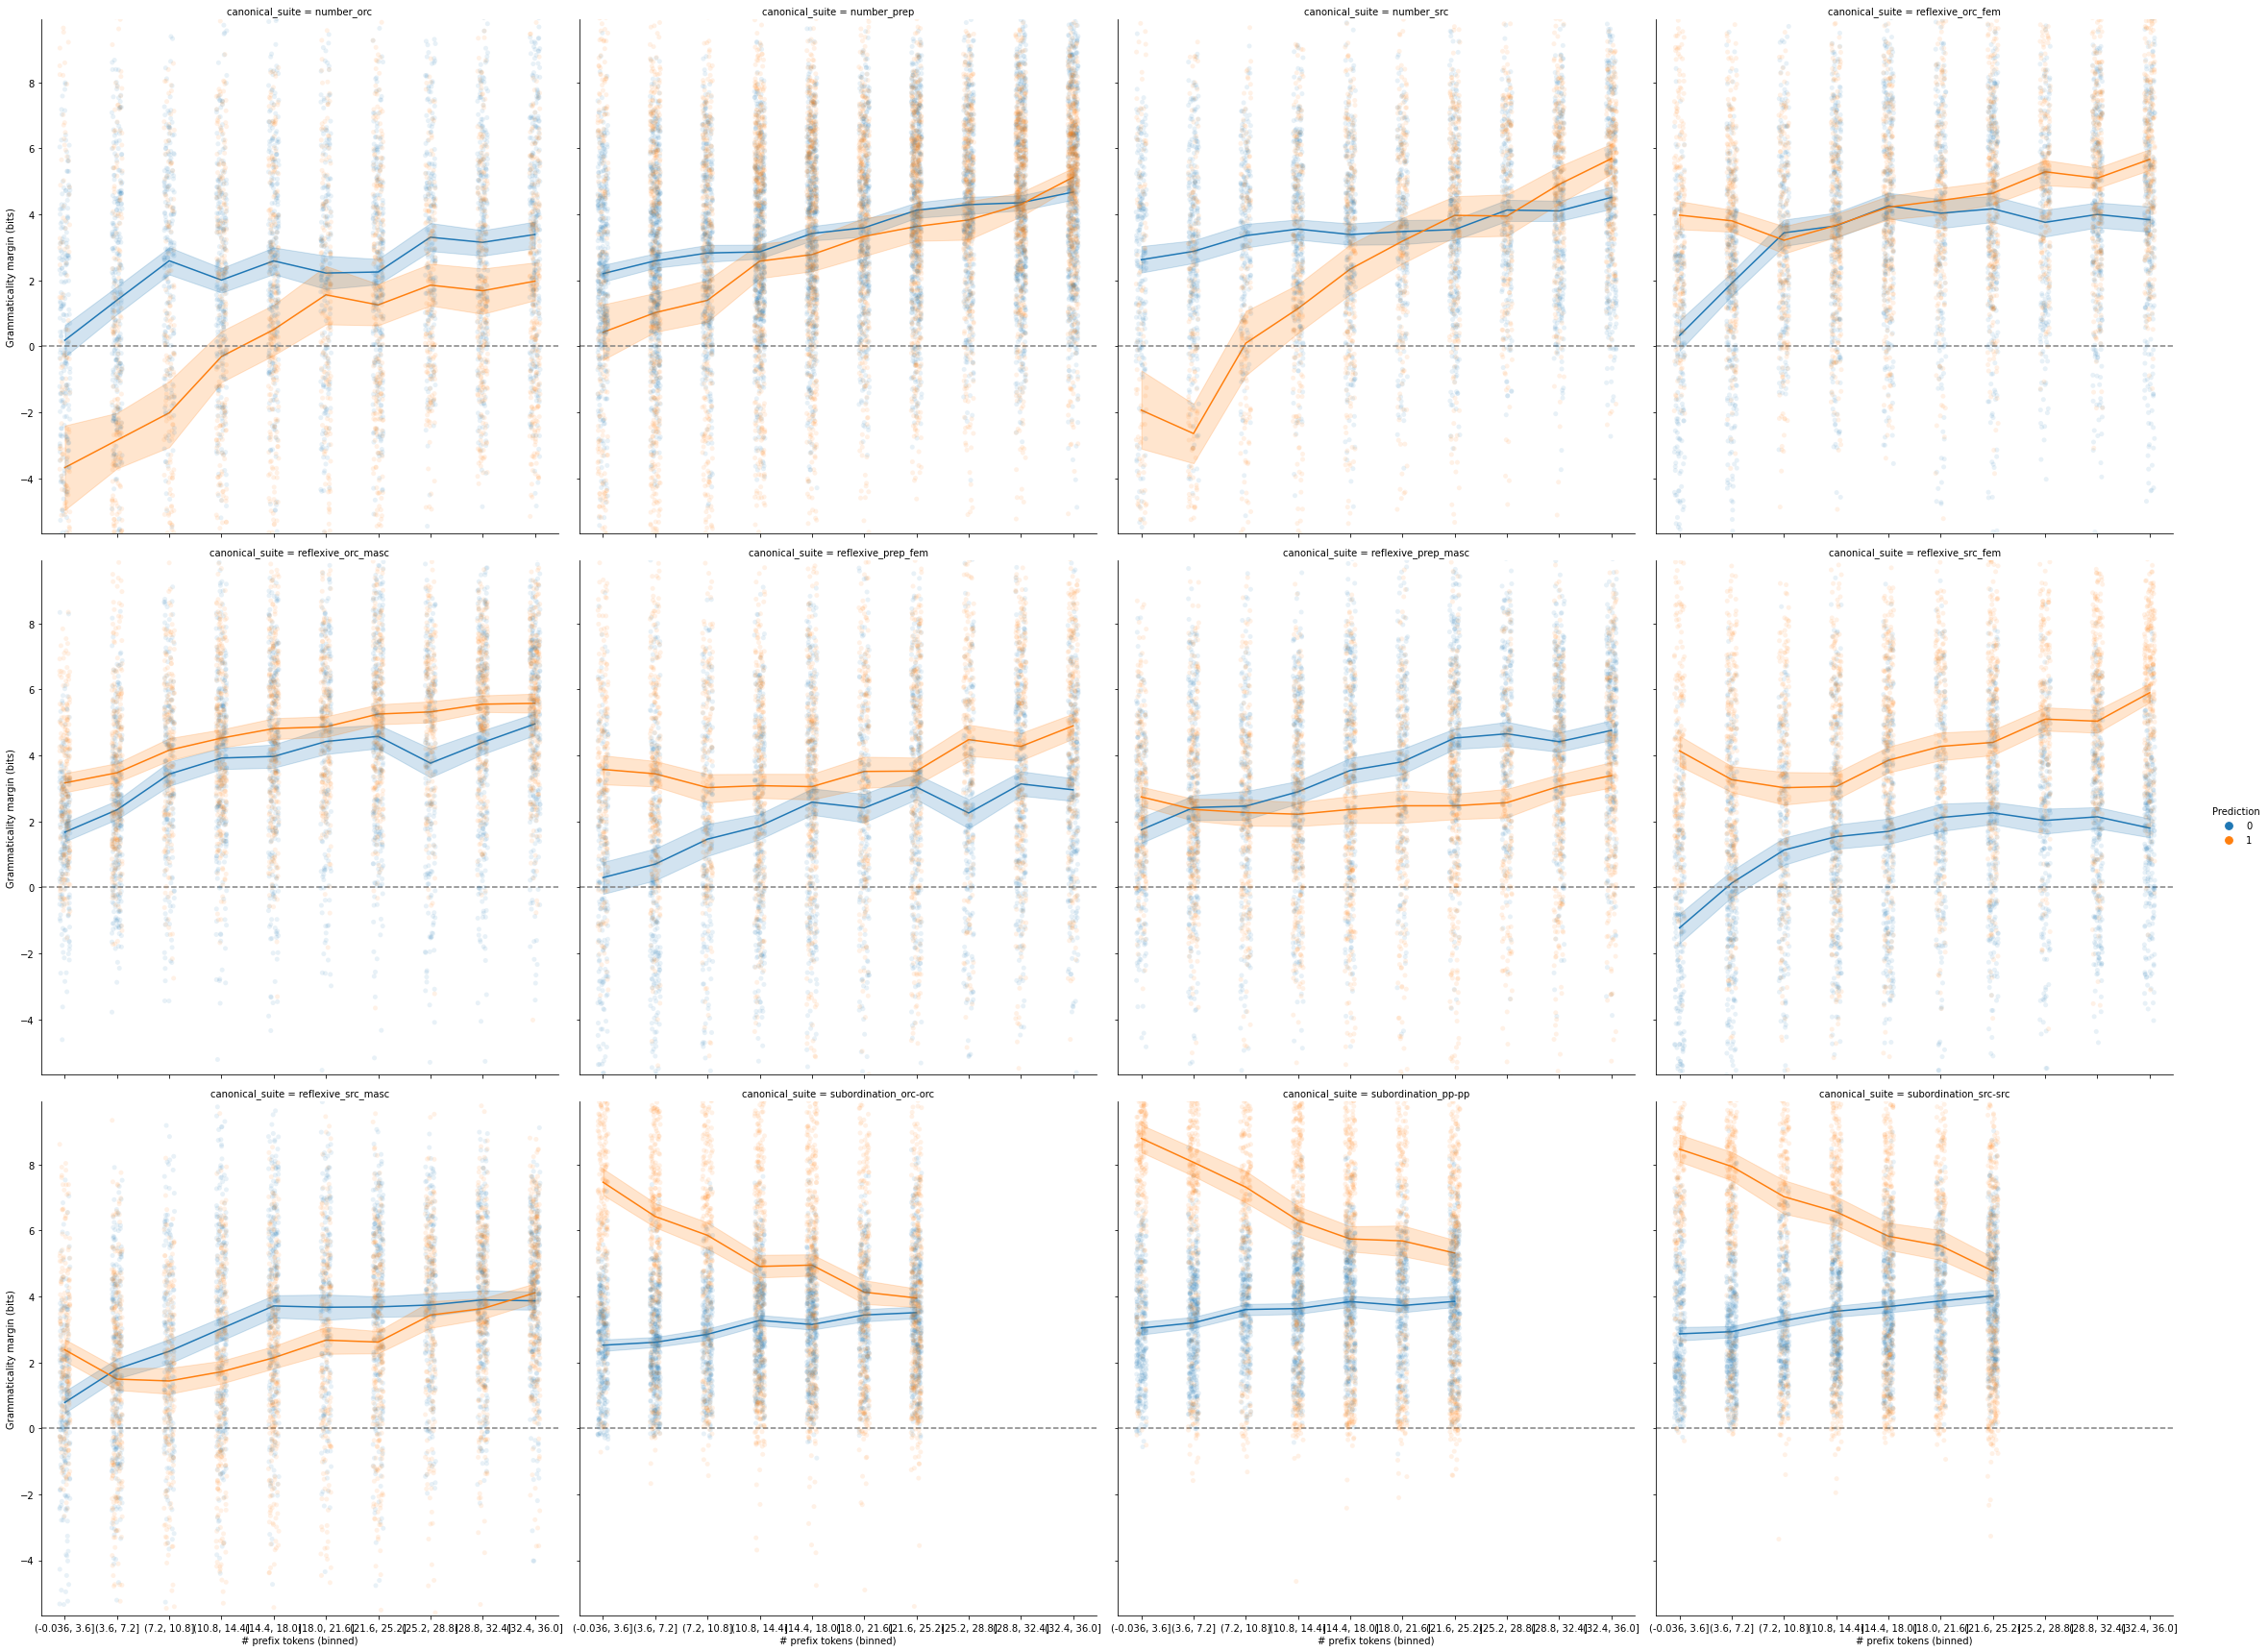

In [103]:
margin_sizes["prefix_length_bin"] = pd.cut(margin_sizes.prefix_length, 10).astype(str)
to_plot = margin_sizes.melt(id_vars=meta_vars,
                            value_vars=[0, 1], var_name="Prediction")
g = sns.catplot(data=to_plot, col="canonical_suite", col_wrap=4,
                x="prefix_length_bin", y="value", hue="Prediction", alpha=0.1, height=8)
g.map(sns.lineplot, "prefix_length_bin", "value", "Prediction")

for ax in g.axes.flat:
    ax.axhline(0, color="gray", linestyle="--")
    ax.set_xticks(ax.get_xticks(), rotation=35)
    ax.set_xlabel("# prefix tokens (binned)")
    ax.set_ylabel("Grammaticality margin (bits)")

In [104]:
# DEV recompute predictions as a sanity check
recompute_preds = margin_sizes.assign(correct_0=(margin_sizes[0] > 0),
                                      correct_1=(margin_sizes[1] > 0))

<AxesSubplot:xlabel='prefix_length_bin', ylabel='value'>

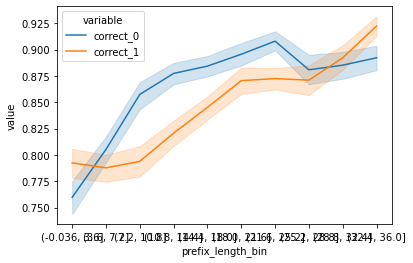

In [105]:
sns.lineplot(data=recompute_preds[["prefix_length_bin", "correct_0", "correct_1"]].melt(id_vars=["prefix_length_bin"]),
             x="prefix_length_bin", y="value", hue="variable")

In [106]:
# recompute_preds[recompute_preds.prefix_length == 0].groupby("canonical_suite").correct.mean()
recompute_preds[recompute_preds.prefix_length == 0][["correct_0", "correct_1"]].melt().groupby("variable").value.mean()

variable
correct_0    0.725
correct_1    0.850
Name: value, dtype: float64

## Total probability margins

In [ ]:
# TODO update with dynamic margin computation (margin_measures)

total_surprisals = region_df.groupby(["suite", "item_number", "condition"]).value.sum()
total_surprisals

In [ ]:
total_margins = total_surprisals.unstack()
total_margins["margin_sing"] = total_margins.mismatch_sing - total_margins.match_sing
total_margins["margin_plural"] = total_margins.mismatch_plural - total_margins.match_plural
# Bring back metadata
total_margins = pd.merge(total_margins.reset_index(), prediction_df[["item_number", "prefix_length", "prefix_length_bin", "first_item", "num_prefix_sentences", "canonical_suite"]].reset_index(),
                         on=["suite", "item_number"])

In [ ]:
to_plot = total_margins.melt(id_vars=["prefix_length_bin", "canonical_suite"],
                             value_vars=["margin_sing", "margin_plural"], var_name="Prediction")
g = sns.catplot(data=to_plot, row="canonical_suite",
                x="prefix_length_bin", y="value", hue="Prediction", alpha=0.1, height=8)
g.map(sns.lineplot, "prefix_length_bin", "value", "Prediction")

for ax in g.axes.flat:
    ax.axhline(0, color="gray", linestyle="--")
    ax.set_xticks(ax.get_xticks(), rotation=35)
    ax.set_xlabel("# prefix tokens (binned)")
g.axes[0, 0].set_ylabel("Grammaticality margin (bits)")